In [12]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import os
from sklearn.model_selection import train_test_split
import torch.nn as nn
from tqdm import tqdm
import re
import seaborn as sns
from utils import pad_images
sns.set_palette('colorblind')
sns.set_style('darkgrid')
global device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from model import RegressionModel

In [2]:
import random
seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True  # If using GPU
torch.backends.cudnn.benchmark = False    # If using GPU


# Read and Preprocess images

In [3]:
#read all images with PIL and store in an array
data = []
for dirname, _, filenames in (os.walk('data')):
    for filename in tqdm(sorted(filenames)):
        if (filename.endswith('.jpg')):
            #print (os.path.join(dirname, filename))
            img = PIL.Image.open(os.path.join(dirname, filename)).convert('L')
            data.append(np.asarray(img).astype('float32'))
            del img
data = np.array(data, dtype='object')

100%|██████████| 2048/2048 [00:00<00:00, 3584.21it/s]


In [4]:
padded_data = pad_images(data,(256,256))
padded_data = padded_data.reshape(padded_data.shape[0],256,256,1)
padded_data.shape

(2048, 256, 256, 1)

In [5]:
# Transpose to feed into torch model
data_t = np.transpose(padded_data, (0, 3, 1, 2))

In [6]:
X = data_t.copy()/255
y = pd.read_csv('label.csv')['label'].values
del padded_data
del data_t
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
del X, y
torch.cuda.empty_cache()

In [7]:
#define data loaders
train_data = torch.utils.data.TensorDataset(torch.from_numpy(X_train).to(device=device, dtype=torch.float), torch.from_numpy(y_train).to(device=device, dtype=torch.float))
#val_data = torch.utils.data.TensorDataset(torch.from_numpy(X_val).to(device=device, dtype=torch.float), torch.from_numpy(y_val).to(device=device, dtype=torch.float))
test_data = torch.utils.data.TensorDataset(torch.from_numpy(X_test).to(device=device, dtype=torch.float), torch.from_numpy(y_test).to(device=device, dtype=torch.float))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=61, shuffle=True)
#val_loader = torch.utils.data.DataLoader(val_data, batch_size=25, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=True)

del X_train, y_train, train_data, test_data

torch.cuda.empty_cache()


# Model Construction

In [83]:
def train(model,X_train,y_train, lr, epochs):
    model = RegressionModel().to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    train_losses = []
    for epoch in (range(epochs)):
        for images, labels in (train_loader):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()



In [123]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(regression_model.parameters(), lr=0.0002500850964289255)

# Training loop
num_epochs =45
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
regression_model.to(device)
train_loss = []
for epoch in tqdm(range(num_epochs)):
    total_loss = 0
    val_loss = []

    for images, targets in train_loader:
        regression_model.train()
        images, targets = images.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = regression_model(images)
        loss = criterion(outputs.squeeze(), targets.float()) 
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        #validate
        regression_model.eval()
        total_val_loss = 0
    train_loss.append(total_loss / len(train_loader))

    


    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")
    #print(f"Epoch {epoch+1}/{num_epochs}, Val Loss: {avg_val_loss/len(val_loader)}")


  2%|▏         | 1/45 [00:08<05:53,  8.02s/it]

Epoch 1/45, Loss: 224.84765522296613


  4%|▍         | 2/45 [00:16<05:45,  8.03s/it]

Epoch 2/45, Loss: 188.41274452209473


  7%|▋         | 3/45 [00:24<05:37,  8.04s/it]

Epoch 3/45, Loss: 111.81502239520734


  9%|▉         | 4/45 [00:32<05:30,  8.05s/it]

Epoch 4/45, Loss: 122.55035400390625


 11%|█         | 5/45 [00:40<05:22,  8.07s/it]

Epoch 5/45, Loss: 126.42292638925406


 13%|█▎        | 6/45 [00:48<05:15,  8.09s/it]

Epoch 6/45, Loss: 155.59054198631873


 16%|█▌        | 7/45 [00:56<05:07,  8.10s/it]

Epoch 7/45, Loss: 183.44398381159857


 18%|█▊        | 8/45 [01:04<05:00,  8.12s/it]

Epoch 8/45, Loss: 101.39873020465558


 20%|██        | 9/45 [01:12<04:52,  8.13s/it]

Epoch 9/45, Loss: 112.81892725137564


 22%|██▏       | 10/45 [01:21<04:45,  8.15s/it]

Epoch 10/45, Loss: 68.51302433013916


 24%|██▍       | 11/45 [01:29<04:37,  8.16s/it]

Epoch 11/45, Loss: 120.14482659559984


 27%|██▋       | 12/45 [01:37<04:29,  8.17s/it]

Epoch 12/45, Loss: 118.13995713454027


 29%|██▉       | 13/45 [01:45<04:21,  8.18s/it]

Epoch 13/45, Loss: 97.63303756713867


 31%|███       | 14/45 [01:53<04:13,  8.19s/it]

Epoch 14/45, Loss: 74.96203158451961


 33%|███▎      | 15/45 [02:02<04:06,  8.20s/it]

Epoch 15/45, Loss: 76.36833080878624


 36%|███▌      | 16/45 [02:10<03:58,  8.21s/it]

Epoch 16/45, Loss: 165.1842384338379


 38%|███▊      | 17/45 [02:18<03:50,  8.22s/it]

Epoch 17/45, Loss: 90.97877737192007


 40%|████      | 18/45 [02:26<03:42,  8.22s/it]

Epoch 18/45, Loss: 118.76121931809645


 42%|████▏     | 19/45 [02:34<03:33,  8.23s/it]

Epoch 19/45, Loss: 72.13670664567213


 44%|████▍     | 20/45 [02:43<03:25,  8.24s/it]

Epoch 20/45, Loss: 85.52680110931396


 47%|████▋     | 21/45 [02:51<03:17,  8.24s/it]

Epoch 21/45, Loss: 87.35473192655124


 49%|████▉     | 22/45 [02:59<03:09,  8.25s/it]

Epoch 22/45, Loss: 78.10453987121582


 51%|█████     | 23/45 [03:08<03:01,  8.25s/it]

Epoch 23/45, Loss: 99.87709720318134


 53%|█████▎    | 24/45 [03:16<02:53,  8.26s/it]

Epoch 24/45, Loss: 93.7730616056002


 56%|█████▌    | 25/45 [03:24<02:45,  8.26s/it]

Epoch 25/45, Loss: 79.13907990088829


 58%|█████▊    | 26/45 [03:32<02:37,  8.27s/it]

Epoch 26/45, Loss: 63.24786112858699


 60%|██████    | 27/45 [03:41<02:28,  8.27s/it]

Epoch 27/45, Loss: 74.26358875861534


 62%|██████▏   | 28/45 [03:49<02:20,  8.27s/it]

Epoch 28/45, Loss: 132.29589777726395


 64%|██████▍   | 29/45 [03:57<02:12,  8.28s/it]

Epoch 29/45, Loss: 304.1816601386437


 67%|██████▋   | 30/45 [04:05<02:04,  8.28s/it]

Epoch 30/45, Loss: 4579.775885948768


 69%|██████▉   | 31/45 [04:14<01:55,  8.28s/it]

Epoch 31/45, Loss: 1123.2464799147385


 71%|███████   | 32/45 [04:22<01:47,  8.29s/it]

Epoch 32/45, Loss: 510.3520636925331


 73%|███████▎  | 33/45 [04:30<01:39,  8.29s/it]

Epoch 33/45, Loss: 525.8923542316144


 76%|███████▌  | 34/45 [04:39<01:31,  8.29s/it]

Epoch 34/45, Loss: 2115.9790637676533


 78%|███████▊  | 35/45 [04:47<01:22,  8.29s/it]

Epoch 35/45, Loss: 486.9841596163236


 80%|████████  | 36/45 [04:55<01:14,  8.29s/it]

Epoch 36/45, Loss: 270.6726573063777


 82%|████████▏ | 37/45 [05:04<01:06,  8.29s/it]

Epoch 37/45, Loss: 210.19836601844202


 84%|████████▍ | 38/45 [05:12<00:58,  8.30s/it]

Epoch 38/45, Loss: 200.24147605895996


 87%|████████▋ | 39/45 [05:20<00:49,  8.30s/it]

Epoch 39/45, Loss: 112.06908798217773


 89%|████████▉ | 40/45 [05:28<00:41,  8.30s/it]

Epoch 40/45, Loss: 112.36691284179688


 91%|█████████ | 41/45 [05:37<00:33,  8.31s/it]

Epoch 41/45, Loss: 174.3807150033804


 93%|█████████▎| 42/45 [05:45<00:24,  8.31s/it]

Epoch 42/45, Loss: 132.69030057466946


 96%|█████████▌| 43/45 [05:53<00:16,  8.31s/it]

Epoch 43/45, Loss: 157.94723026569073


 98%|█████████▊| 44/45 [06:02<00:08,  8.31s/it]

Epoch 44/45, Loss: 137.52544843233548


100%|██████████| 45/45 [06:10<00:00,  8.23s/it]

Epoch 45/45, Loss: 173.20039719801682


In [18]:
#regression_model = RegressionModel().to(device)
#regression_model.load_state_dict(torch.load('model.pth'))
#criterion = nn.MSELoss()

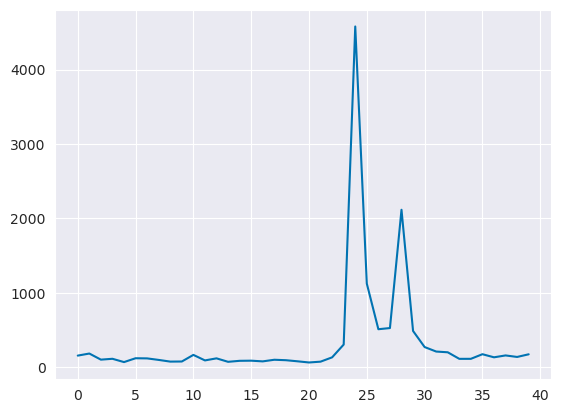

In [124]:
#plt.plot(val_loss, label   ='Validation loss')
plt.plot(train_loss[5:], label='Training loss')

In [19]:
regression_model.eval()
total_test_loss = 0
yhat = []
y = []
with torch.no_grad():
    for images, targets in test_loader:
        images, targets = images.to(device), targets.to(device)
        outputs = regression_model(images)
        yhat.append(outputs.squeeze().cpu().numpy().tolist())
        y.append(targets.cpu().numpy().tolist())
        loss = criterion(outputs.squeeze(), targets.float())  
        total_test_loss += loss.item()

avg_test_loss = np.sqrt(total_test_loss / len(test_loader))
print(f"Test RMSE: {avg_test_loss}")

y = np.array(y, dtype=object)
yhat = np.array(yhat , dtype=object)
y = np.concatenate(y)
#yhat = np.concatenate(yhat)

/home/luizf/miniconda3/envs/neuralforecast/lib/python3.11/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test RMSE: 9.899503407790846


In [106]:
#save model
#torch.save(regression_model.state_dict(), 'model.pth')

In [112]:
df = pd.DataFrame(columns=['yhat', 'y'])
df['yhat'] = yhat
df['y'] = y
df.sort_values(by=['y'], inplace=True)

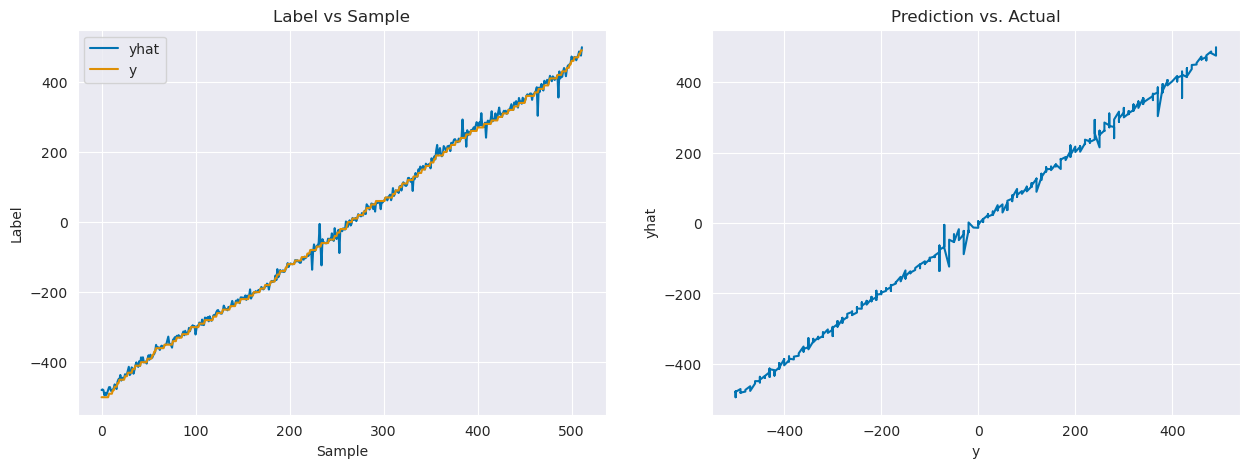

In [113]:
#create suplot with 2 columns and 1 row
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(df['yhat'].values)
ax[0].plot(df['y'].values)
ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Label')
ax[0].legend(['yhat', 'y'])
ax[0].set_title('Label vs Sample')

ax[1].plot(df['y'].values, df['yhat'].values)
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Prediction vs. Actual')

plt.show()

In [58]:
df

yhat      y
208 -463.502136 -500.0
297 -474.288635 -500.0
236 -478.836761 -500.0
489 -479.913361 -500.0
419 -474.822479 -500.0
..          ...    ...
65   450.846008  470.0
160  462.896667  480.0
145  466.277832  480.0
371  472.933838  490.0
485  466.303162  490.0

[512 rows x 2 columns]

# Test with the new video data

In [30]:
del train_loader
del test_loader
torch.cuda.empty_cache()

In [31]:
#read all images with PIL and store in an array
data = []
for dirname, _, filenames in (os.walk('data2')):
    for filename in tqdm(sorted(filenames, key=lambda x: int(re.sub('\D', '', x)))):
        if (filename.endswith('.jpg')):
            #print (os.path.join(dirname, filename))
            img = PIL.Image.open(os.path.join(dirname, filename)).convert('L')
            data.append(np.asarray(img).astype('float32'))
            del img
data = np.array(data)/255

100%|██████████| 442/442 [00:00<00:00, 10903.65it/s]


In [32]:
padded_data = pad_images(data,(256,256))
padded_data = padded_data.reshape(padded_data.shape[0],256,256,1)
data_t = np.transpose(padded_data, (0, 3, 1, 2))
data_t = torch.from_numpy(data_t).to(device)

In [33]:
dl = DataLoader(data_t, batch_size=40, shuffle=False)

In [34]:
yhats = []
imgs = []
for i in dl:
    yhat = regression_model (i)
    imgs.append(i.detach().cpu().numpy())
    yhats.append(yhat.detach().cpu().numpy())
    del yhat
    torch.cuda.empty_cache()

In [35]:
yhats = np.concatenate(yhats)
imgs = np.concatenate(imgs)

In [36]:
imgs = np.transpose(imgs, (0,2,3,1))

In [56]:
r = np.arange(0, len(yhats)/20, 1/20)

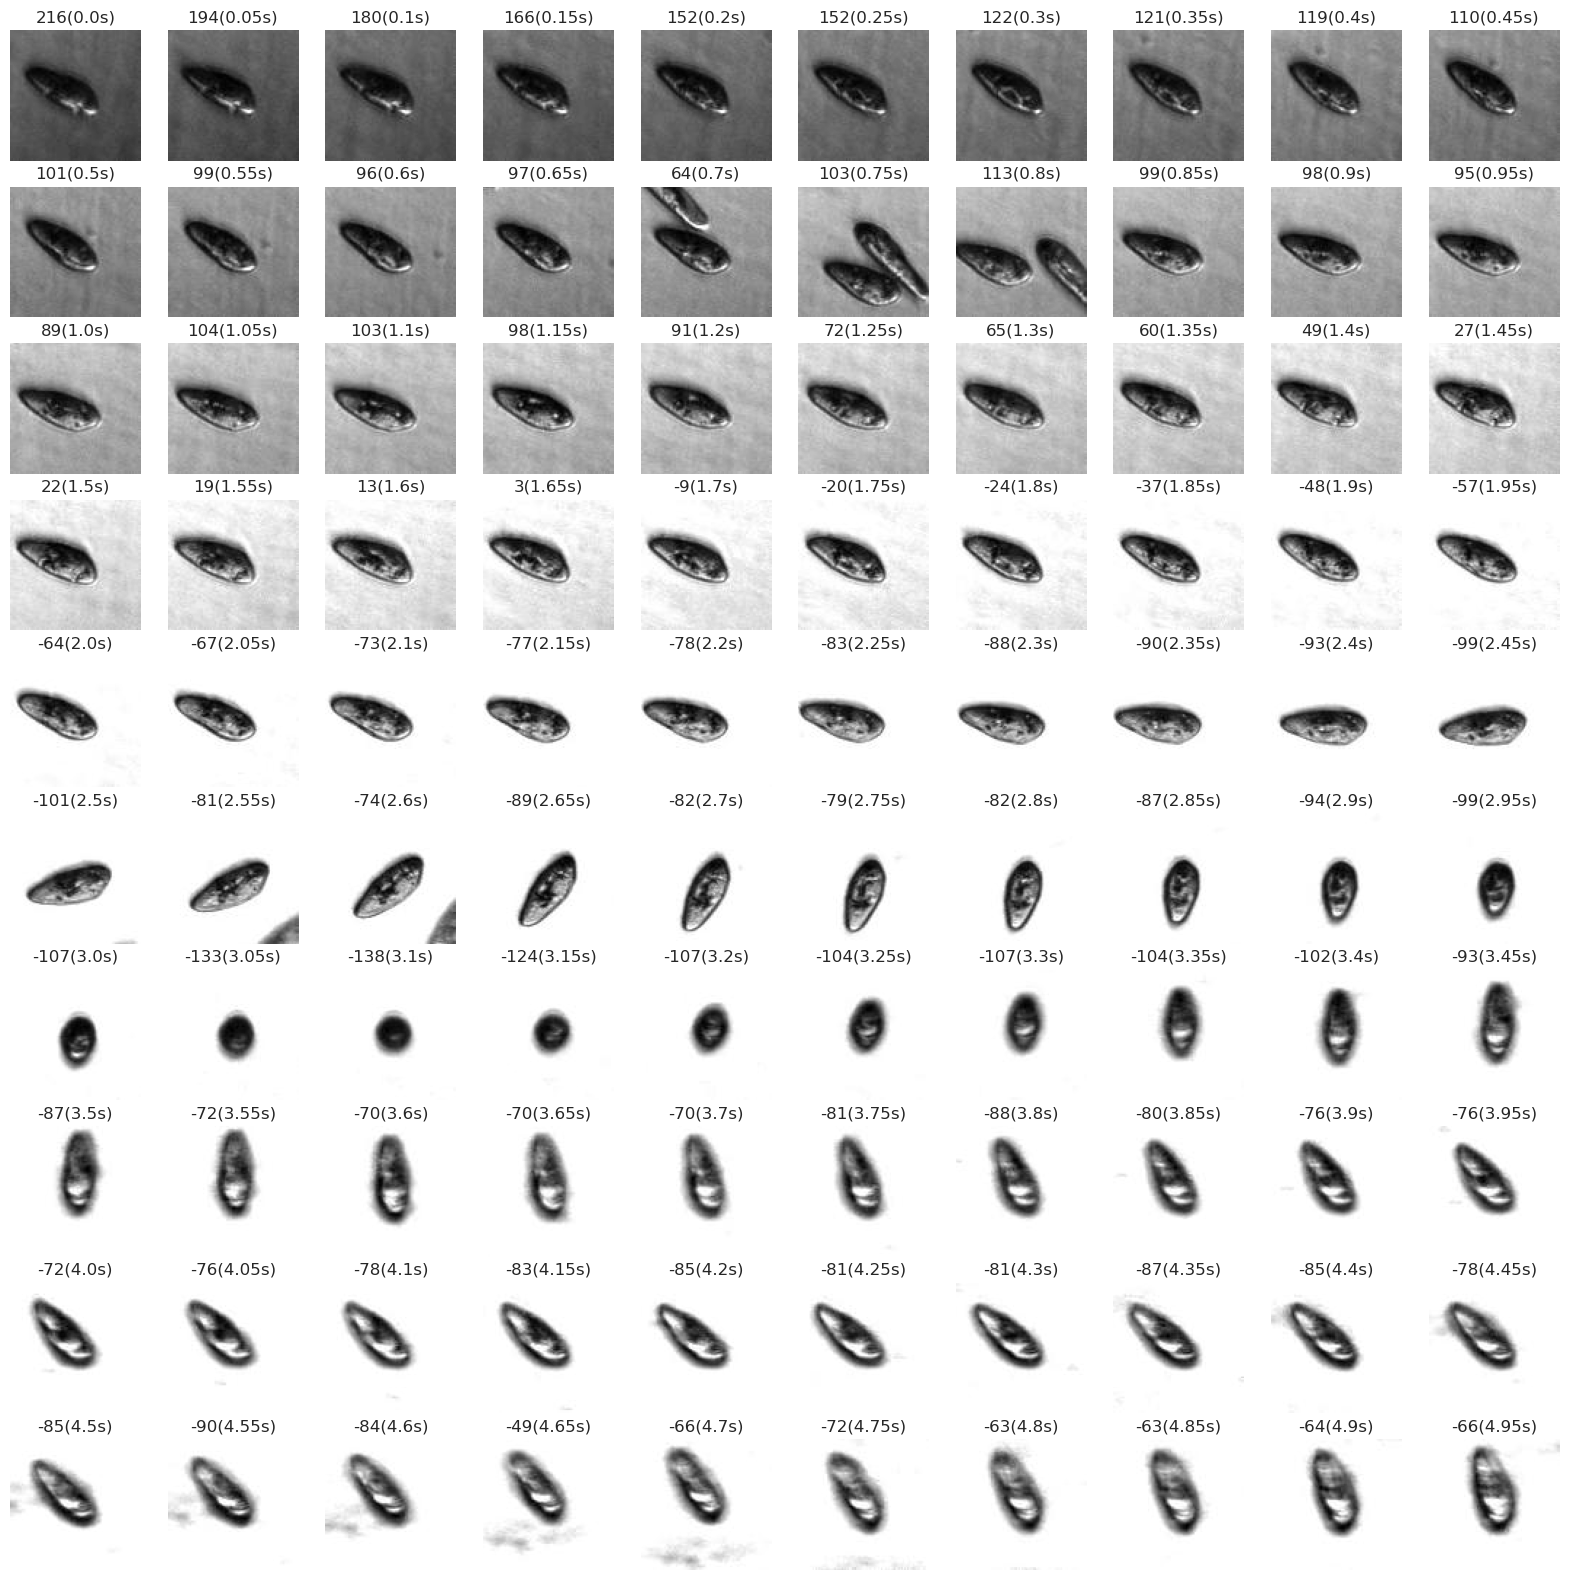

In [62]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i in range(100):
    ax[i//10, i%10].imshow(imgs[i, :90, :90], cmap='gray')
    ax[i//10, i%10].set_title(str(int(yhats[i]))+ '(' + str(np.round(r[i],2)) + 's)')
    ax[i//10, i%10].axis('off')

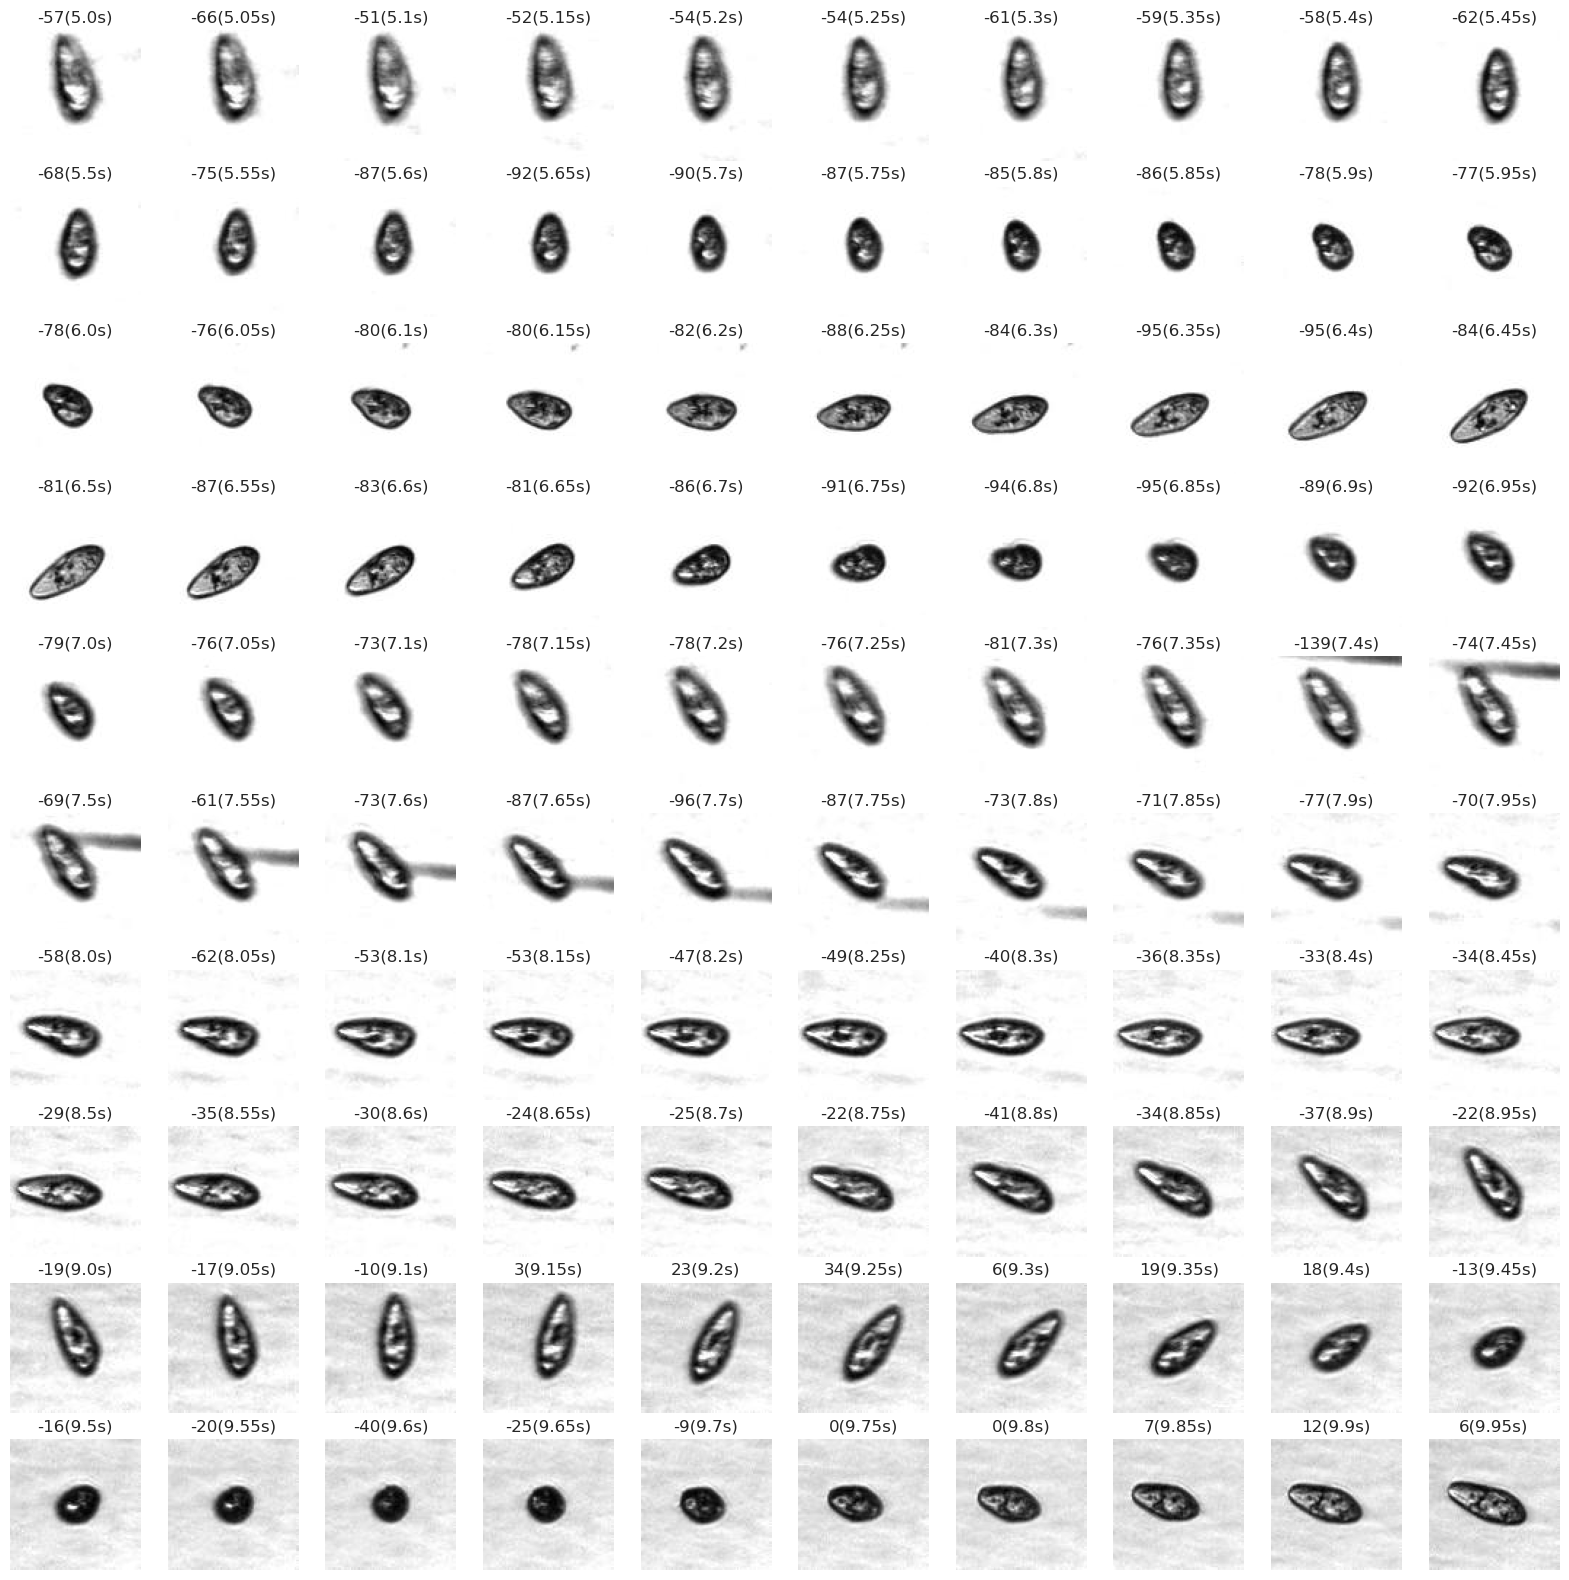

In [65]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i,j in enumerate(range(100, 200)):
    ax[i//10, i%10].imshow(imgs[j, :90, :90], cmap='gray')
    ax[i//10, i%10].set_title(str(int(yhats[j]))+ '(' + str(np.round(r[j],2)) + 's)')
    ax[i//10, i%10].axis('off')

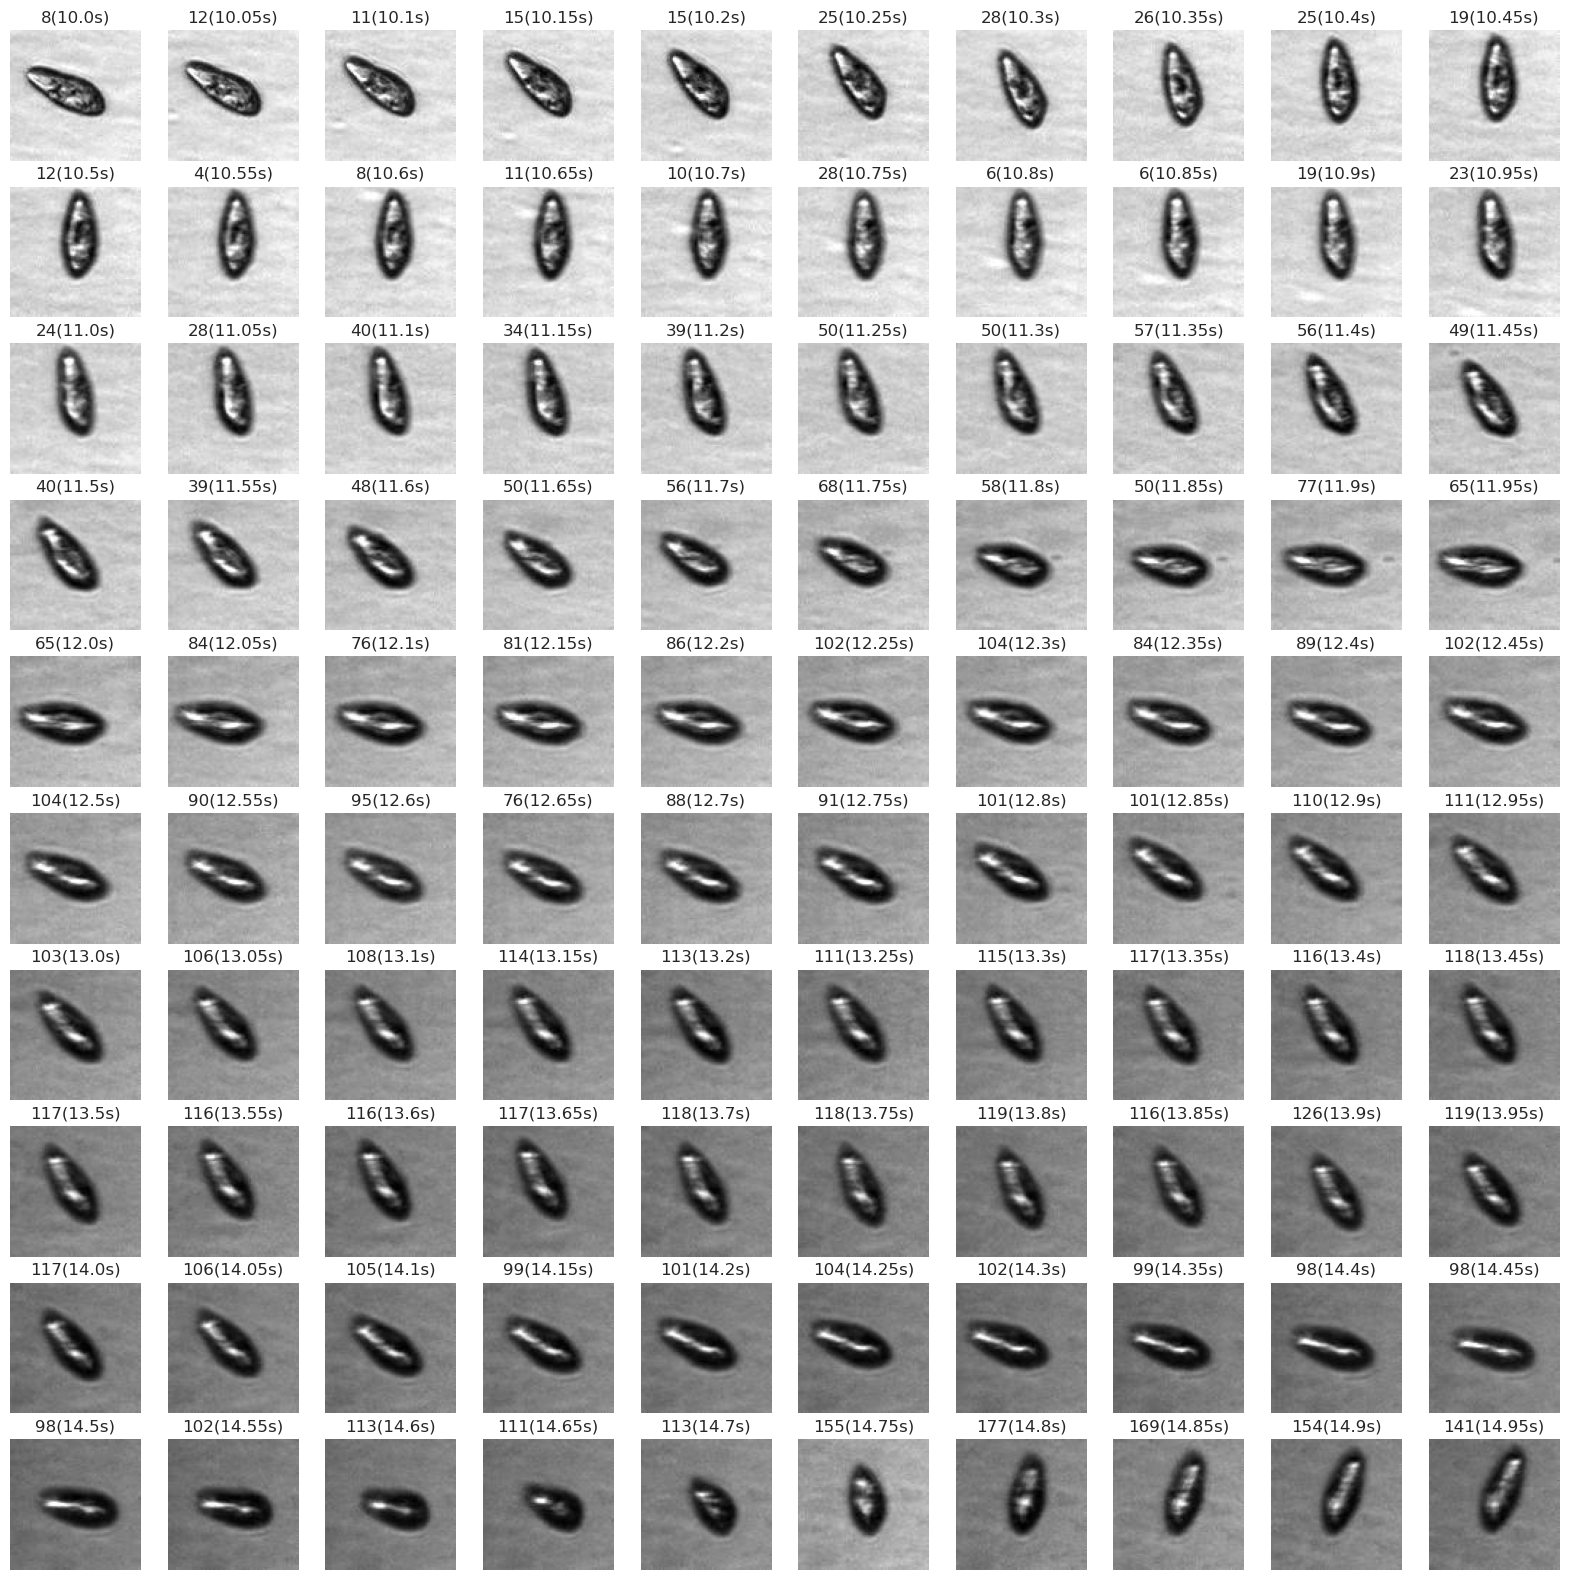

In [66]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i,j in enumerate(range(200, 300)):
    ax[i//10, i%10].imshow(imgs[j, :90, :90], cmap='gray')
    ax[i//10, i%10].set_title(str(int(yhats[j]))+ '(' + str(np.round(r[j],2)) + 's)')
    ax[i//10, i%10].axis('off')

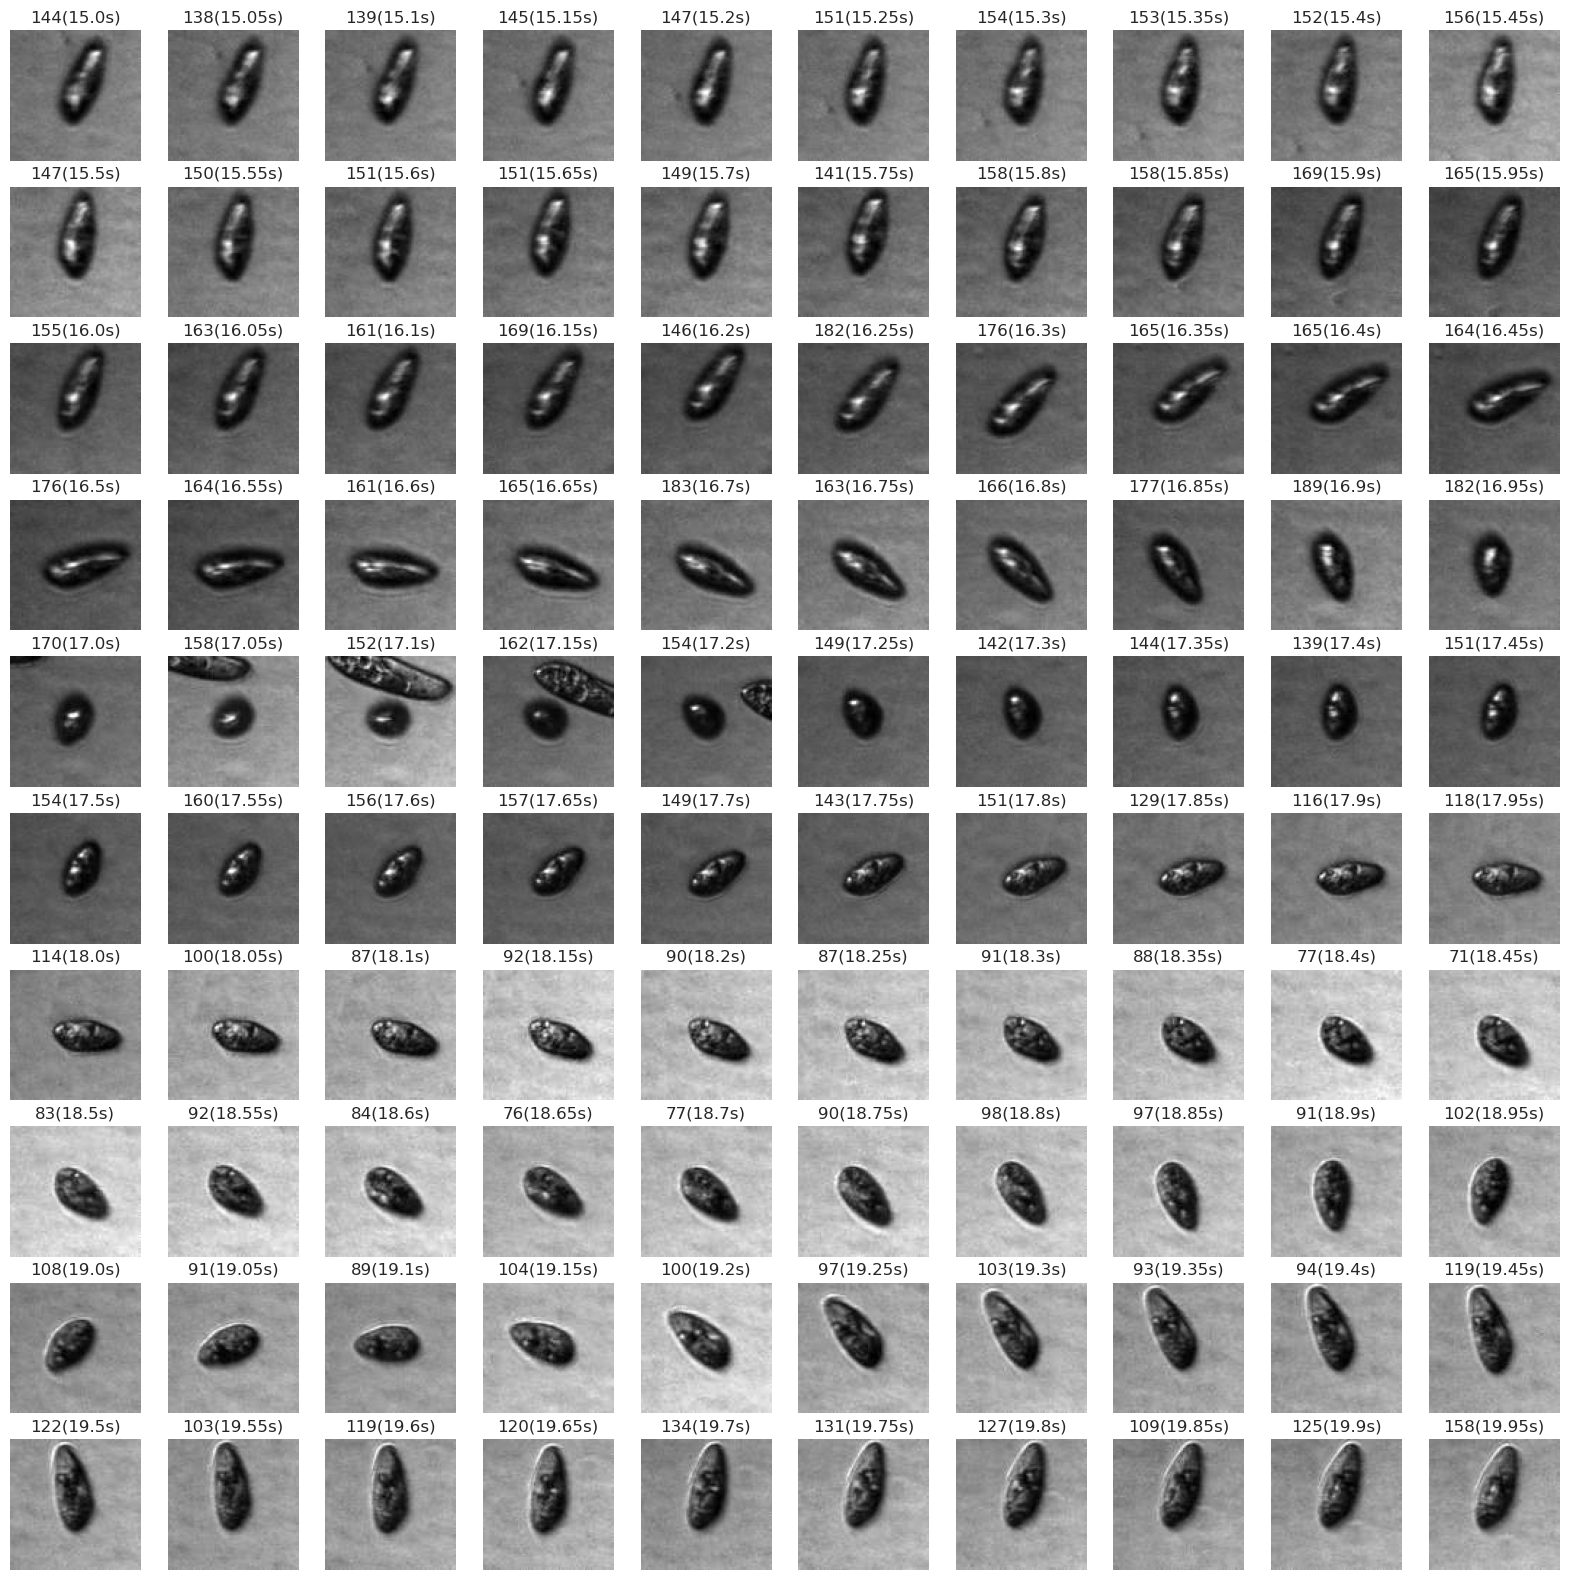

In [68]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i,j in enumerate(range(300, 400)):
    ax[i//10, i%10].imshow(imgs[j, :90, :90], cmap='gray')
    ax[i//10, i%10].set_title(str(int(yhats[j]))+ '(' + str(np.round(r[j],2)) + 's)')
    ax[i//10, i%10].axis('off')

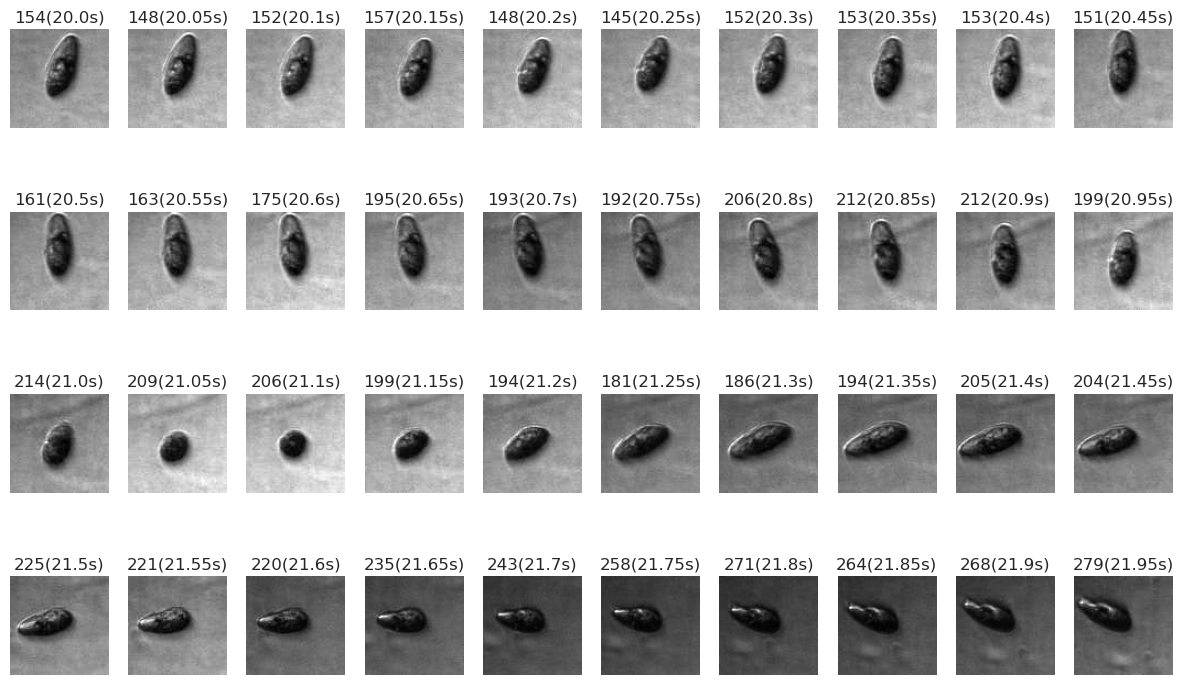

In [75]:

fig, ax = plt.subplots(4, 10, figsize=(15, 15))
for i,j in enumerate(range(400, 440)):
    ax[i//10, i%10].imshow(imgs[j, :90, :90], cmap='gray')
    ax[i//10, i%10].set_title(str(int(yhats[j]))+ '(' + str(np.round(r[j],2)) + 's)')
    ax[i//10, i%10].axis('off')



    #decrease distance betweeen subplots
    plt.subplots_adjust( hspace=-0.7)

In [76]:
#Save yhats to txt
np.savetxt("yhat.txt", yhats, fmt="%s")

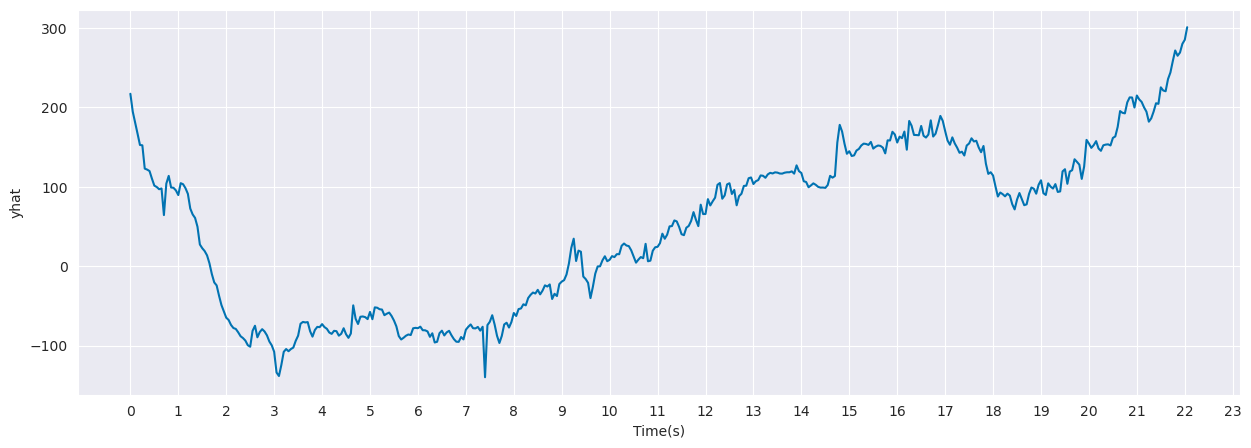

In [77]:
plt.figure(figsize=(15, 5))
plt.plot (r, yhats)
plt.ylabel('yhat')
plt.xlabel('Time(s)')
#make the x scale more precise
plt.xticks(np.arange(min(r), max(r)+1, 1))
plt.show()

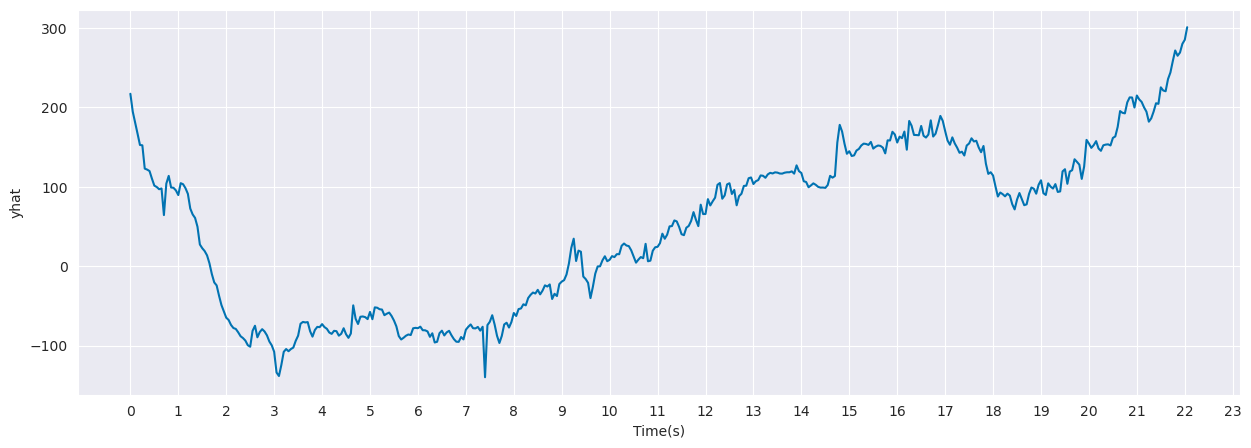

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot (r, yhats)
plt.ylabel('yhat')
plt.xlabel('Time(s)')
#make the x scale more precise
plt.xticks(np.arange(min(r), max(r)+1, 1))
plt.show()